In [1]:
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
file = '/home/mapper/SurveyMonkey/MapTheSeas/EditedData/ProcessedResponses.csv'

In [3]:
# Set up Pandas Dataframe
df = pd.read_csv(file)
total = float(len(df))

In [4]:
def set_style():
    import seaborn as sbn
    
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sbn.set_context("paper")

    # Set the font to be serif, rather than sans
    sbn.set(font='serif')

    # Make the background white, and specify the
    # specific font family
    sbn.set_style("whitegrid", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]})


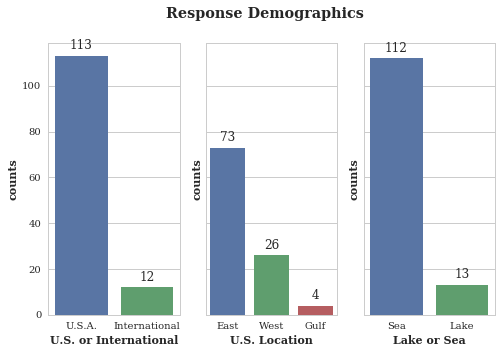

In [5]:
# Question 2: Response Demographic

# Set up figure
set_style()
# Subplots for 3 demographic questions
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
f.suptitle('Response Demographics', fontweight='bold')
f.set_size_inches(8, 5)
# sbn.set_palette('GnBu_d')

# USA or International Subplot
Question2A = sbn.countplot(x="U.S.A. or International", data=df, ax=ax1)
for p in Question2A.patches:
    height = p.get_height()
    Question2A.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), 
                   ha="center")
Question2A.xaxis.set_label_text("U.S. or International", fontweight='bold')
Question2A.yaxis.set_label_text("counts", fontweight='bold')    

# East or West Coast Subplot
Question2B = sbn.countplot(x="U.S. East or West Coast", data=df, ax=ax2)
for p in Question2B.patches:
    height = p.get_height()
    Question2B.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), 
                   ha="center")
Question2B.xaxis.set_label_text("U.S. Location", fontweight='bold')
Question2B.yaxis.set_label_text("counts", fontweight='bold')    
 
# Lake or Sea Subplot   
Question2C = sbn.countplot(x="Lake or Sea", data=df, ax=ax3)
for p in Question2C.patches:
    height = p.get_height()
    Question2C.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), 
                   ha="center")
Question2C.xaxis.set_label_text("Lake or Sea", fontweight='bold')
Question2C.yaxis.set_label_text("counts", fontweight='bold')

# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question2.png'
f.savefig(filename, dpi=300, format='png')


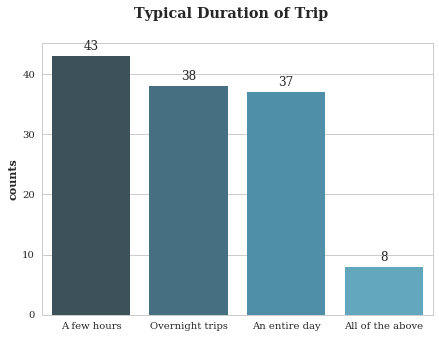

In [6]:
# Question 3: How long do you typically go out for
f, ax1 = plt.subplots(ncols=1)
f.suptitle('Typical Duration of Trip', fontweight='bold')
f.set_size_inches(7, 5)
sbn.set_palette('GnBu_d')

Question3 = sbn.countplot(x="Question 3", data=df, order=['A few hours', 
                                                          'Overnight trips',
                                                          'An entire day',
                                                           'All of the above'])
Question3.xaxis.set_label_text(" ", fontweight='bold')
Question3.yaxis.set_label_text("counts", fontweight='bold')
for p in Question3.patches:
    height = p.get_height()
    Question3.text(p.get_x()+p.get_width()/2., height + 1, '{:1.0f}'.format(height), 
                   ha="center")
# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question3.png'
f.savefig(filename, dpi=300, format='png')


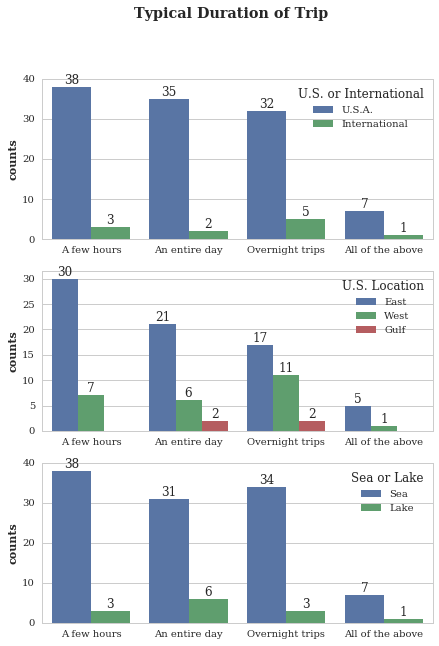

In [7]:
# Question 3: Subplots
f, (ax1,ax2,ax3) = plt.subplots(nrows=3)
f.suptitle('Typical Duration of Trip', fontweight='bold')
f.set_size_inches(7, 10)
sbn.set_palette('deep',2)

# U.S.A. vs International
Question3A = sbn.countplot(x="Question 3", ax=ax1, data=df, hue='U.S.A. or International',
                          order=['A few hours', 'An entire day', 'Overnight trips',
                                                           'All of the above'])
Question3A.xaxis.set_label_text(" ", fontweight='bold')
Question3A.yaxis.set_label_text("counts", fontweight='bold')
Question3A.legend(loc='upper right', title='U.S. or International')
for p in Question3A.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question3A.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
    
# East vs. West
sbn.set_palette('deep', 3)
Question3B = sbn.countplot(x="Question 3", ax=ax2, data=df, hue='U.S. East or West Coast',
                            order=['A few hours', 'An entire day', 'Overnight trips', 
                                   'All of the above'])                     
Question3B.xaxis.set_label_text(" ", fontweight='bold')
Question3B.yaxis.set_label_text("counts", fontweight='bold')
for p in Question3B.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question3B.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
Question3B.legend(loc='upper right', title='U.S. Location')




# Sea vs. Lake
sbn.set_palette('deep', 2)
Question3C = sbn.countplot(x="Question 3", ax=ax3, data=df, hue='Lake or Sea',
                          order=['A few hours', 'An entire day', 'Overnight trips',
                                                           'All of the above'])
Question3C.xaxis.set_label_text(" ", fontweight='bold')
Question3C.yaxis.set_label_text("counts", fontweight='bold')
Question3C.legend(loc='upper right', title='Sea or Lake')
for p in Question3C.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question3C.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question3_subplots.png'
f.savefig(filename, dpi=300, format='png')


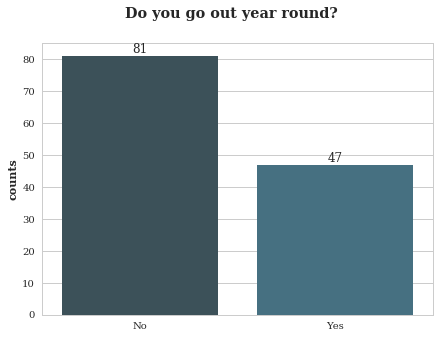

In [8]:
# Question 4: Do you go out year round?
f=plt.figure()
f.suptitle('Do you go out year round?', fontweight='bold')
set_style()
f.set_size_inches(7, 5)
sbn.set_palette('GnBu_d')

Question4 = sbn.countplot(x="Question 4", data=df)
Question4.xaxis.set_label_text(" ", fontweight='bold')
Question4.yaxis.set_label_text("counts", fontweight='bold')
for p in Question4.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question4.annotate('{:1.0f}'.format(y),(x.mean(),y), 
            ha='center', va='bottom')

# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question4.png'
f.savefig(filename, dpi=300, format='png')
    

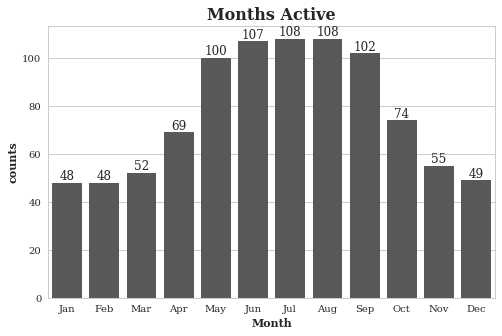

In [9]:
# Month's Active
filename = '/home/mapper/SurveyMonkey/MapTheSeas/EditedData/ActiveMonths.csv'
months = pd.read_csv(filename)
sbn.set_palette('inferno', 12)
set_style()
list(months)

x = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = [(months['Jan'] == 'Y').sum(), (months['Feb'] == 'Y').sum(),
     (months['Mar'] == 'Y').sum(), (months['Apr'] == 'Y').sum(),
     (months['May'] == 'Y').sum(), (months['Jun'] == 'Y').sum(),
     (months['Jul'] == 'Y').sum(), (months['Aug'] == 'Y').sum(),
     (months['Sep'] == 'Y').sum(), (months['Oct'] == 'Y').sum(),
     (months['Nov'] == 'Y').sum(), (months['Dec'] == 'Y').sum()] 
fig = plt.figure()
fig.set_size_inches(8, 5)
ax = plt.axes()
monthplt = sbn.barplot(x=x, y=y, color='0.35')
for p in monthplt.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    monthplt.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
ax.set_title('Months Active', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontweight='bold')
ax.set_ylabel('counts', fontweight='bold')


# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/MonthsActive.png'
f.savefig(filename, dpi=300, format='png')

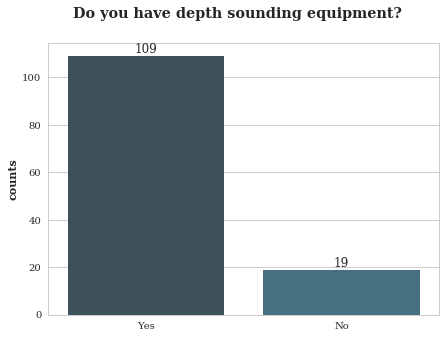

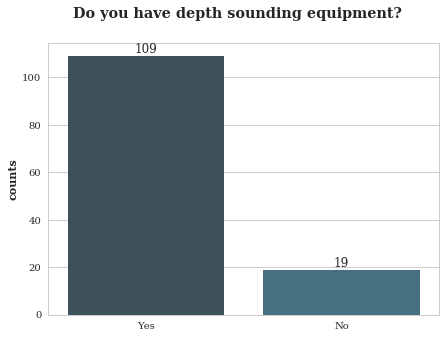

In [10]:
# Question 5: Do you have depth sounding equipment?
f = plt.figure()
f.suptitle('Do you have depth sounding equipment?', fontweight='bold')
f.set_size_inches(7, 5)
sbn.set_palette('GnBu_d')

Question5 = sbn.countplot(x="Question 5", data=df)
Question5.yaxis.set_label_text("counts", fontweight='bold')
Question5.xaxis.set_label_text(" ", fontweight='bold')
for p in Question5.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question5.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')

# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question5.png'
f.savefig(filename, dpi=300, format='png')
    

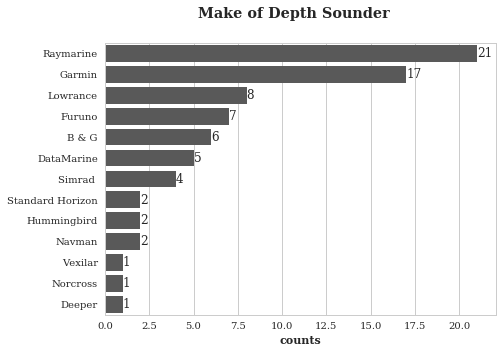

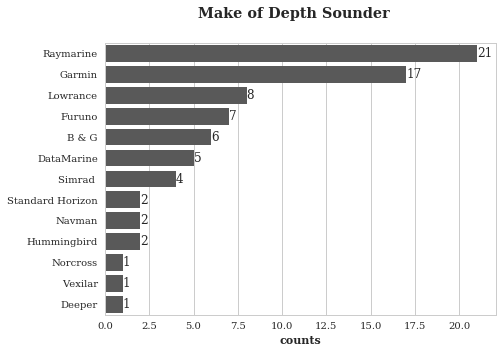

In [11]:
# Question 5: Type of Sonar
f = plt.figure()
f.suptitle('Make of Depth Sounder', fontweight='bold')
f.set_size_inches(7, 5)
sbn.set_palette('GnBu_d')

Question5A = sbn.countplot(y="Question 5 Add", data=df, color='0.35', 
                           order=df['Question 5 Add'].value_counts().index)
Question5A.yaxis.set_label_text(" ", fontweight='bold')
Question5A.xaxis.set_label_text("counts", fontweight='bold')
for p in Question5A.patches:
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    Question5A.annotate('{:1.0f}'.format(x), (x, y.mean()), 
            ha='left', va='center')
# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question5A.png'
f.savefig(filename, dpi=300, format='png')

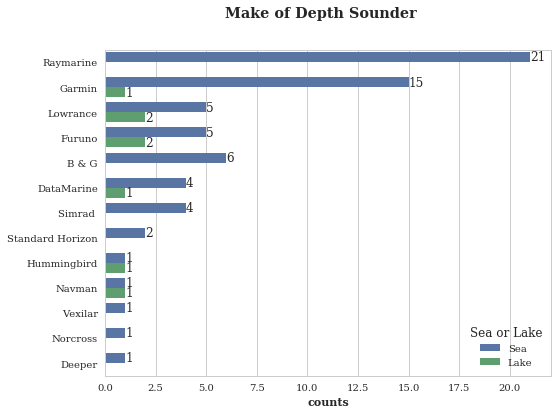

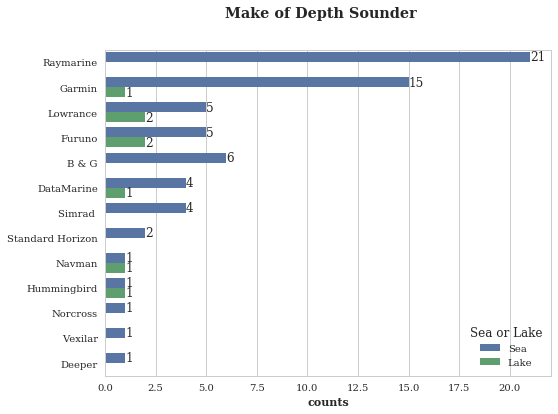

In [12]:
# Question 5: Type of Sonar by Lake or Sea
f = plt.figure()
f.suptitle('Make of Depth Sounder', fontweight='bold')
f.set_size_inches(8, 6)
sbn.set_palette('deep', 2)

Question5B = sbn.countplot(y="Question 5 Add", data=df,
                           order=df['Question 5 Add'].value_counts().index, hue='Lake or Sea')
Question5B.yaxis.set_label_text(" ", fontweight='bold')
Question5B.xaxis.set_label_text("counts", fontweight='bold')
Question5B.legend(loc='lower right', title='Sea or Lake')
for p in Question5B.patches:
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    Question5B.annotate('{:1.0f}'.format(x), (x, y.mean()), 
            ha='left', va='center')
# Export    
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question5B.png'
f.savefig(filename, dpi=300, format='png')

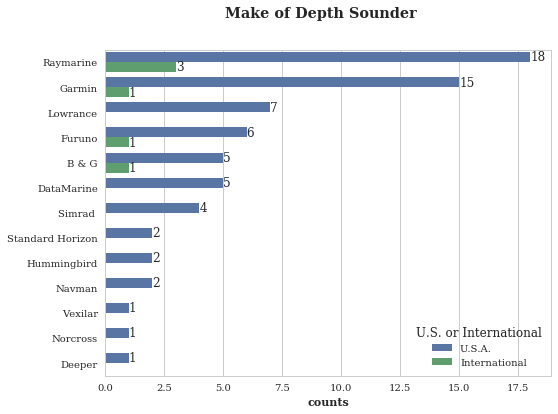

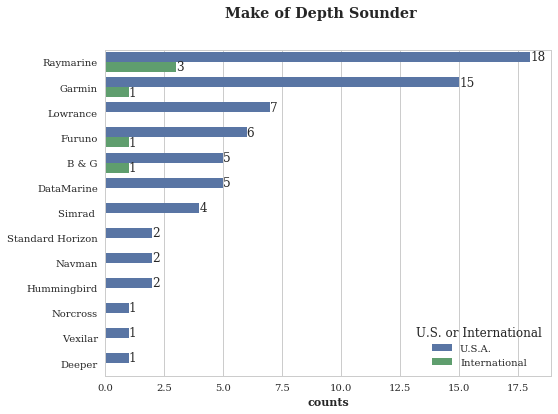

In [13]:
# Question 5: Type of Sonar by U.S. or International
f = plt.figure()
f.suptitle('Make of Depth Sounder', fontweight='bold')
f.set_size_inches(8, 6)
sbn.set_palette('deep', 2)

Question5C = sbn.countplot(y="Question 5 Add", data=df,
                           order=df['Question 5 Add'].value_counts().index, 
                           hue='U.S.A. or International')
Question5C.yaxis.set_label_text(" ", fontweight='bold')
Question5C.xaxis.set_label_text("counts", fontweight='bold')
Question5C.legend(loc='lower right', title='U.S. or International')
for p in Question5C.patches:
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    Question5C.annotate('{:1.0f}'.format(x), (x, y.mean()), 
            ha='left', va='center')
#Export    
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question5C.png'
f.savefig(filename, dpi=300, format='png')


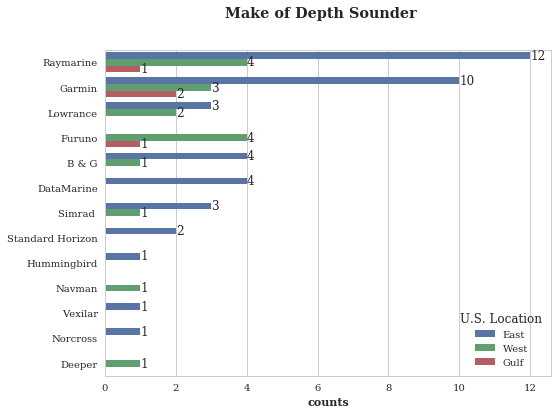

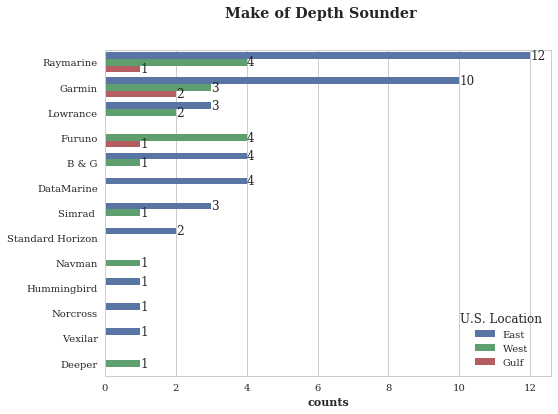

In [14]:
# Question 5: Type of Sonar by U.S. or International
f = plt.figure()
f.suptitle('Make of Depth Sounder', fontweight='bold')
f.set_size_inches(8, 6)
sbn.set_palette('deep', 3)

Question5D = sbn.countplot(y="Question 5 Add", data=df,
                           order=df['Question 5 Add'].value_counts().index, 
                           hue='U.S. East or West Coast')
Question5D.yaxis.set_label_text(" ", fontweight='bold')
Question5D.xaxis.set_label_text("counts", fontweight='bold')
Question5D.legend(loc='lower right', title='U.S. Location')
for p in Question5D.patches:
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    Question5D.annotate('{:1.0f}'.format(x), (x, y.mean()), 
            ha='left', va='center')
# Export    
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question5D.png'
f.savefig(filename, dpi=300, format='png')

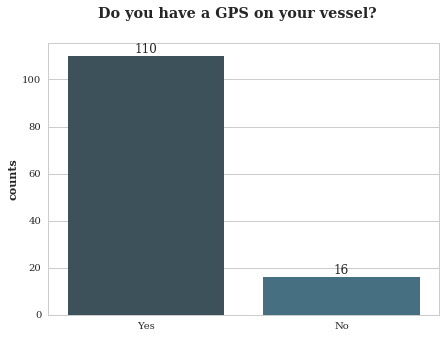

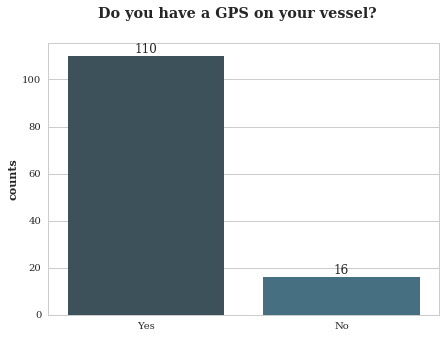

In [15]:
# Question 6: Do you have a GPS on your vessel?
f = plt.figure()
f.suptitle('Do you have a GPS on your vessel?', fontweight='bold')
f.set_size_inches(7, 5)
sbn.set_palette('GnBu_d')

Question6 = sbn.countplot(x="Question 6", data=df)
Question6.yaxis.set_label_text("counts", fontweight='bold')
Question6.xaxis.set_label_text(" ", fontweight='bold')
for p in Question6.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question6.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question6.png'
f.savefig(filename, dpi=300, format='png')

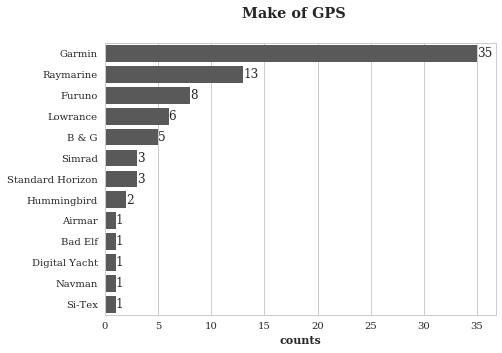

In [16]:
# Make of GPS Equipment
df2 = df[['Question 6P', 'Question 6P2', 'Question 6P3']].copy()
Counts = df2.apply(pd.Series.value_counts)
Counts['Sum'] = Counts.sum(axis=1)
f = plt.figure()
f.suptitle('Make of GPS', fontweight='bold')
f.set_size_inches(7, 5)

Question6A = sbn.barplot(x=list(Counts['Sum']), y=list(Counts.index), data=Counts,
                         color='0.35',
                         order=['Garmin', 'Raymarine', 'Furuno', 'Lowrance',
                         'B & G', 'Simrad', 'Standard Horizon', 'Hummingbird',
                         'Airmar', 'Bad Elf', 'Digital Yacht', 'Navman', 'Si-Tex'])
Question6A.yaxis.set_label_text(" ", fontweight='bold')
Question6A.xaxis.set_label_text("counts", fontweight='bold')
for p in Question6A.patches:
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    Question6A.annotate('{:1.0f}'.format(x), (x, y.mean()), 
            ha='left', va='center')
# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question6A.png'
f.savefig(filename, dpi=300, format='png')

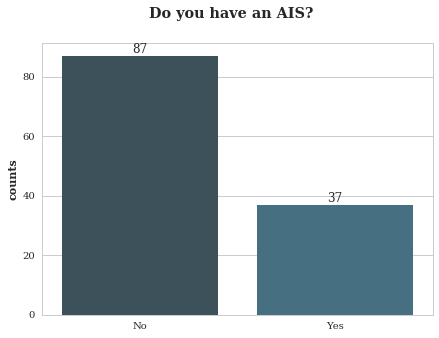

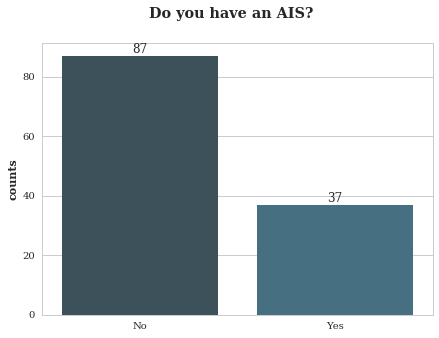

In [17]:
# Question 7: Do you have an AIS unit?
f = plt.figure()
f.suptitle('Do you have an AIS?', fontweight='bold')
f.set_size_inches(7, 5)
sbn.set_palette('GnBu_d')

Question7 = sbn.countplot(x="Question 7", data=df)
Question7.yaxis.set_label_text("counts", fontweight='bold')
Question7.xaxis.set_label_text(" ", fontweight='bold')
for p in Question7.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question7.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question7.png'
f.savefig(filename, dpi=300, format='png')


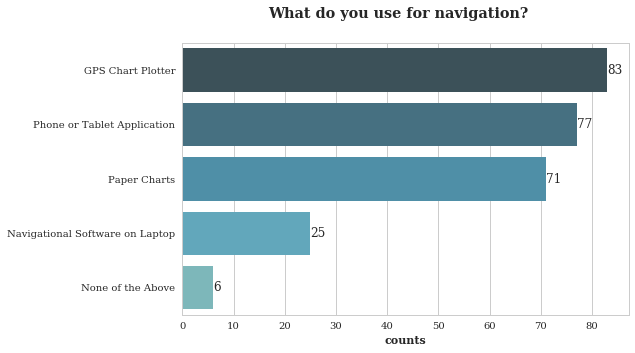

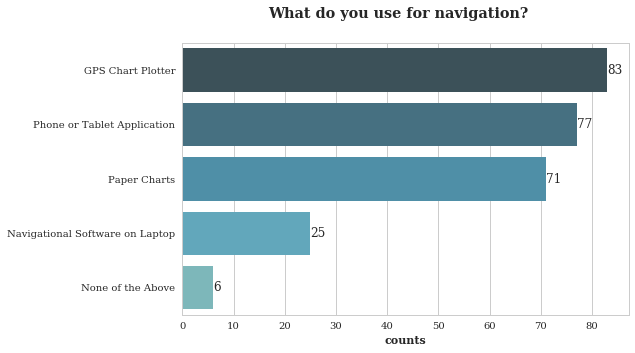

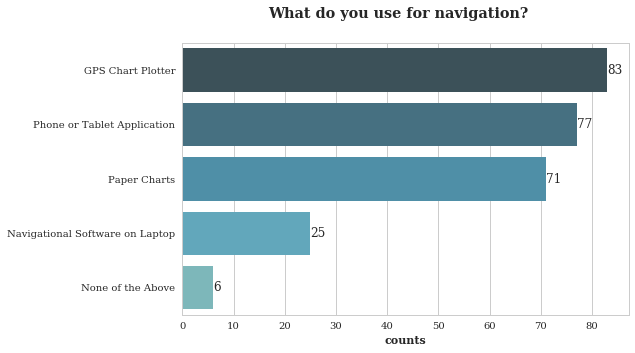

In [18]:
# Question 8: What do you use for navigation?
f = plt.figure()
f.suptitle('What do you use for navigation?', fontweight='bold')
f.set_size_inches(8, 5)
sbn.set_palette('GnBu_d')

y = [int(df['Question 8S1'].value_counts()), int(df['Question 8S2'].value_counts()),
     int(df['Question 8S3'].value_counts()), int(df['Question 8S4'].value_counts()), 
     int(df['Question 8S5'].value_counts())]
x = [df['Question 8S1'].value_counts().index.tolist()[0], 
     df['Question 8S2'].value_counts().index.tolist()[0],
     df['Question 8S3'].value_counts().index.tolist()[0], 
     df['Question 8S4'].value_counts().index.tolist()[0],
     df['Question 8S5'].value_counts().index.tolist()[0]]

Question8 = sbn.barplot(x=y, y=x, data=df, order=['GPS Chart Plotter',
                                                  'Phone or Tablet Application',
                                                  'Paper Charts',
                                                  'Navigational Software on Laptop',
                                                  'None of the Above'])

Question8.xaxis.set_label_text("counts", fontweight='bold')
Question8.yaxis.set_label_text(" ", fontweight='bold')

for p in Question8.patches:
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    Question8.annotate('{:1.0f}'.format(x), (x, y.mean()), 
            ha='left', va='center')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question8.png'
f.savefig(filename, dpi=300, format='png')



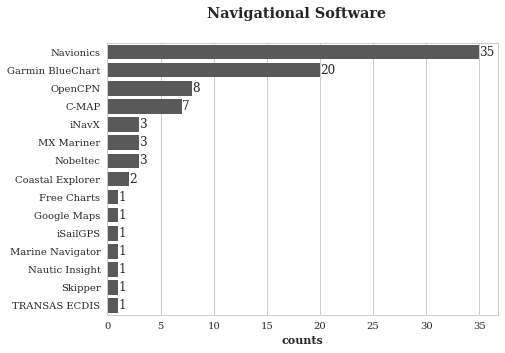

In [19]:
# Navigation Software
df2 = df[['Question 8P1', 'Question 8P2', 'Question 8P3']].copy()
Counts = df2.apply(pd.Series.value_counts)
Counts['Sum'] = Counts.sum(axis=1)
f = plt.figure()
f.suptitle('Navigational Software', fontweight='bold')
f.set_size_inches(7, 5)

Question8A = sbn.barplot(x=list(Counts['Sum']), y=list(Counts.index), data=Counts,
                         color='0.35',
                         order=['Navionics', 'Garmin BlueChart', 'OpenCPN', 'C-MAP',
                         'iNavX', 'MX Mariner', 'Nobeltec', 'Coastal Explorer',
                         'Free Charts', 'Google Maps', 'iSailGPS', 'Marine Navigator',
                        'Nautic Insight', 'Skipper', 'TRANSAS ECDIS'])
Question8A.yaxis.set_label_text(" ", fontweight='bold')
Question8A.xaxis.set_label_text("counts", fontweight='bold')
for p in Question8A.patches:
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    Question8A.annotate('{:1.0f}'.format(x), (x, y.mean()), 
            ha='left', va='center')
# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question8A.png'
f.savefig(filename, dpi=300, format='png')

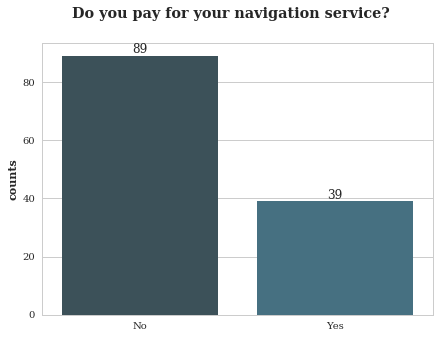

In [20]:
# Question 9: Do you pay for your navigation service?
f = plt.figure()
f.suptitle('Do you pay for your navigation service?', fontweight='bold')
f.set_size_inches(7, 5)
sbn.set_palette('GnBu_d')

Question9 = sbn.countplot(x="Question 9", data=df)
Question9.yaxis.set_label_text("counts", fontweight='bold')
Question9.xaxis.set_label_text(" ", fontweight='bold')
for p in Question9.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question9.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question9.png'
f.savefig(filename, dpi=300, format='png')

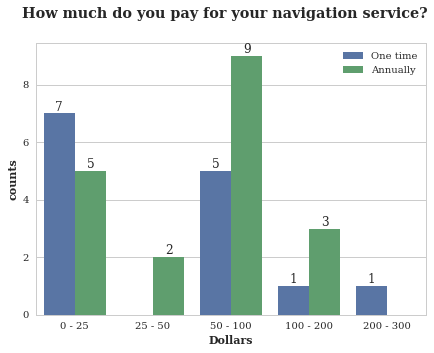

In [21]:
# Question 9A: How much?
f = plt.figure()
f.suptitle('How much do you pay for your navigation service?', fontweight='bold')
f.set_size_inches(7, 5)
set_style()
sbn.set_palette('deep', 2)

Question9A = sbn.countplot(x="Question 9P2", data=df, hue="Question 9P1",
                           order=['0 - 25', '25 - 50', '50 - 100', '100 - 200', 
                                  '200 - 300'])
Question9A.xaxis.set_label_text("Dollars", fontweight='bold')
Question9A.yaxis.set_label_text("counts", fontweight='bold')
for p in Question9A.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question9A.annotate('{:1.0f}'.format(y),(x.mean(),y), 
            ha='center', va='bottom')
Question9A.legend(loc='upper right', title='')    

# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question9A.png'
f.savefig(filename, dpi=300, format='png')

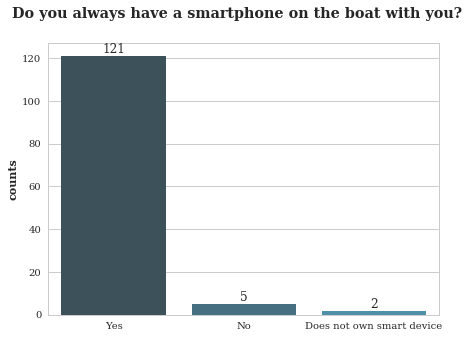

In [22]:
# Question 10: Do you always have a smartphone on the boat with you?
f = plt.figure()
f.suptitle('Do you always have a smartphone on the boat with you?', fontweight='bold')
f.set_size_inches(7, 5)
set_style()
sbn.set_palette('GnBu_d')

Question10 = sbn.countplot(x="Question 10", data=df, order=['Yes', 'No', 'Does not own '
                                                                         'smart device'])
Question10.yaxis.set_label_text("counts", fontweight='bold')
Question10.xaxis.set_label_text(" ", fontweight='bold')
for p in Question10.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question10.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question10.png'
f.savefig(filename, dpi=300, format='png')

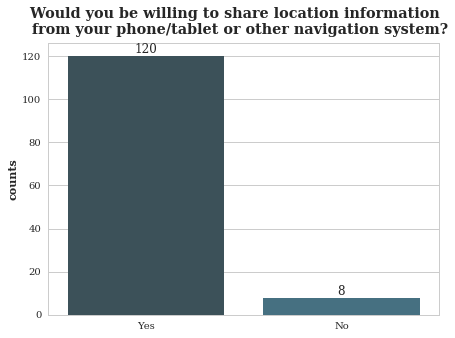

In [23]:
# Question 11: Would you be willing to share location information 
# from your phone/tablet or other navigation system?
f = plt.figure()
f.suptitle('Would you be willing to share location information \n from your '
           'phone/tablet or other navigation system?', fontweight='bold')
f.set_size_inches(7, 5)
set_style()
sbn.set_palette('GnBu_d')

Question11 = sbn.countplot(x="Question 11", data=df)
Question11.yaxis.set_label_text("counts", fontweight='bold')
Question11.xaxis.set_label_text(" ", fontweight='bold')
for p in Question11.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question11.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question11.png'
f.savefig(filename, dpi=300, format='png')

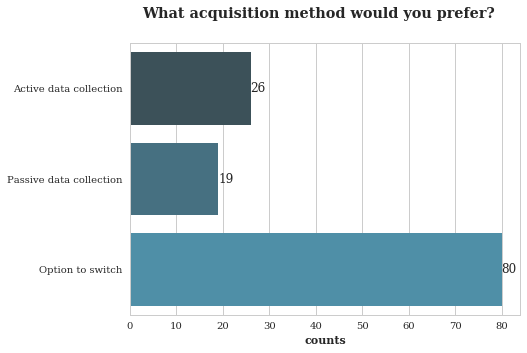

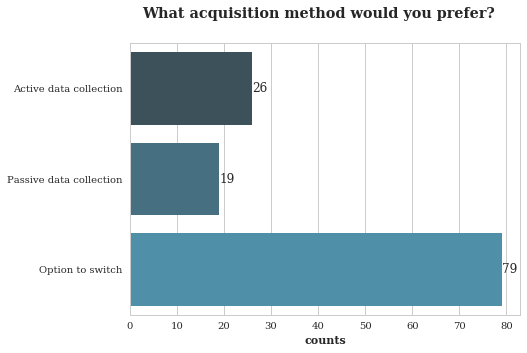

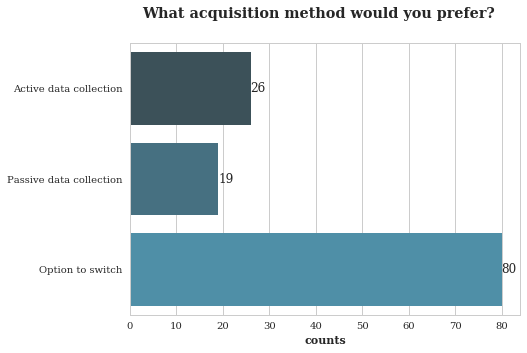

In [24]:
#Question 12: What acquisition method would you prefer?
f = plt.figure()
f.suptitle('What acquisition method would you prefer?', fontweight='bold')
f.set_size_inches(7, 5)
set_style()
sbn.set_palette('GnBu_d')

Question12 = sbn.countplot(y="Question 12", data=df, order=[
            'Active data collection', 'Passive data collection',
            'Option to switch'])              
Question12.yaxis.set_label_text(" ", fontweight='bold')
Question12.xaxis.set_label_text("counts", fontweight='bold')
for p in Question12.patches:
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    Question12.annotate('{:1.0f}'.format(x), (x, y.mean()), 
            ha='left', va='center')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question12.png'
f.savefig(filename, dpi=300, format='png')

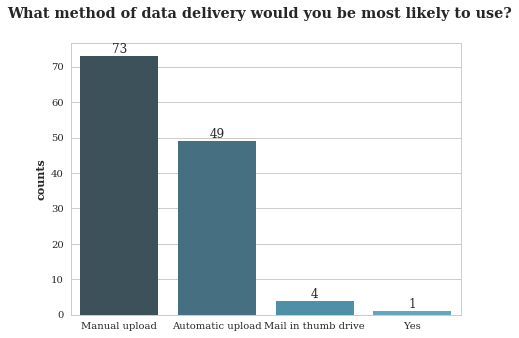

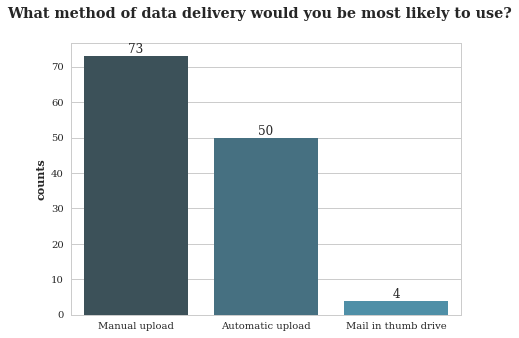

In [25]:
#Question 13: What method of data delivery would you be most likely to use?
f = plt.figure()
f.suptitle('What method of data delivery would you be most likely to use?', fontweight='bold')
f.set_size_inches(7, 5)
set_style()
sbn.set_palette('GnBu_d')

Question13 = sbn.countplot(x="Question 13", data=df)              
Question13.xaxis.set_label_text("  ", fontweight='bold')
Question13.yaxis.set_label_text("counts", fontweight='bold')
for p in Question13.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question13.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question13.png'
f.savefig(filename, dpi=300, format='png')

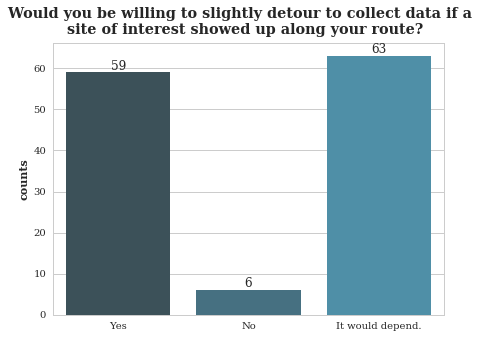

In [26]:
#Question 14: Would you be willing to slightly detour to collect
#  data if a site of interest showed up along your route?
f = plt.figure()
f.suptitle('Would you be willing to slightly detour to collect data if a \n site of interest'
           ' showed up along your route?', fontweight='bold')
f.set_size_inches(7, 5)
set_style()
sbn.set_palette('GnBu_d')

Question14 = sbn.countplot(x="Question 14", data=df, order=['Yes', 'No', 'It would depend.'])              
Question14.xaxis.set_label_text("  ", fontweight='bold')
Question14.yaxis.set_label_text("counts", fontweight='bold')
for p in Question14.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question14.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question14.png'
f.savefig(filename, dpi=300, format='png')

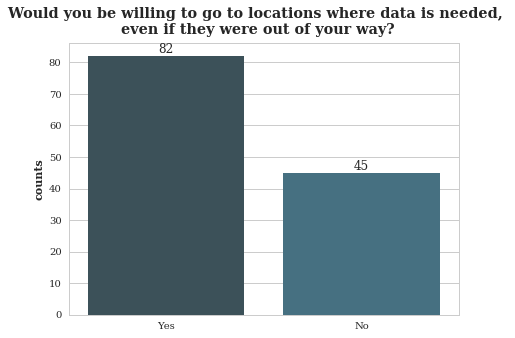

In [27]:
#Question 14: Would you be willing to go to locations where data is needed, 
# even if they were out of your way?
f = plt.figure()
f.suptitle('Would you be willing to go to locations where data is needed, \n'
           'even if they were out of your way?', fontweight='bold')
f.set_size_inches(7, 5)
set_style()
sbn.set_palette('GnBu_d')

Question15 = sbn.countplot(x="Question 15", data=df, order=['Yes', 'No'])              
Question15.xaxis.set_label_text("  ", fontweight='bold')
Question15.yaxis.set_label_text("counts", fontweight='bold')
for p in Question15.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question15.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question15.png'
f.savefig(filename, dpi=300, format='png')

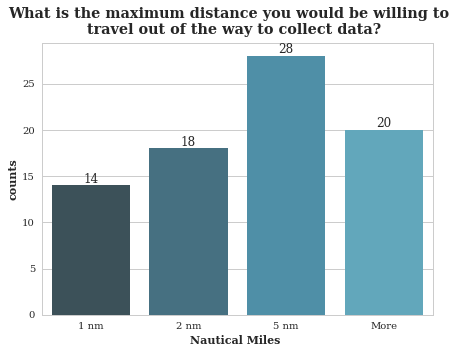

In [28]:
#Question 14: What is the maximum distance you would be willing to 
# travel out of the way to collect data?

f = plt.figure()
f.suptitle('What is the maximum distance you would be willing to \n '
           'travel out of the way to collect data?', fontweight='bold')
f.set_size_inches(7, 5)
set_style()
sbn.set_palette('GnBu_d')

Question16 = sbn.countplot(x="Question 16", data=df, order=['1 nm', '2 nm', '5 nm', 'More'])              
Question16.xaxis.set_label_text("Nautical Miles ", fontweight='bold')
Question16.yaxis.set_label_text("counts", fontweight='bold')
for p in Question16.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question16.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question16.png'
f.savefig(filename, dpi=300, format='png')

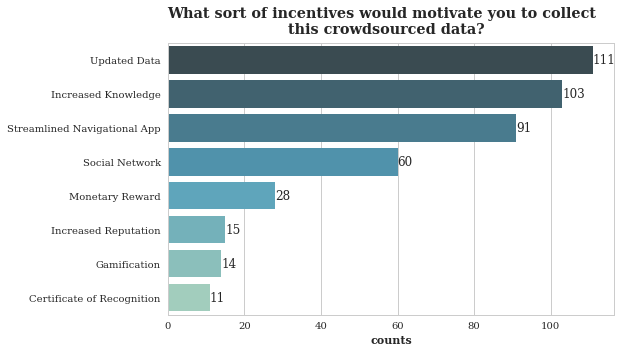

In [29]:
# Question 17: What sort of incentives would motivate you to collect this crowd-sourced data? (select all that apply)
f = plt.figure()
f.suptitle('What sort of incentives would motivate you to collect \n '
           'this crowdsourced data?', fontweight='bold')
f.set_size_inches(8, 5)
sbn.set_palette('GnBu_d', 8)

y = [int(df['Question 17S1'].value_counts()), int(df['Question 17S2'].value_counts()),
     int(df['Question 17S3'].value_counts()), int(df['Question 17S4'].value_counts()), 
     int(df['Question 17S5'].value_counts()), int(df['Question 17S6'].value_counts()),
     int(df['Question 17S7'].value_counts()), int(df['Question 17S8'].value_counts())]
x = [df['Question 17S1'].value_counts().index.tolist()[0], 
     df['Question 17S2'].value_counts().index.tolist()[0],
     df['Question 17S3'].value_counts().index.tolist()[0], 
     df['Question 17S4'].value_counts().index.tolist()[0],
     df['Question 17S5'].value_counts().index.tolist()[0],
     df['Question 17S6'].value_counts().index.tolist()[0],
     df['Question 17S7'].value_counts().index.tolist()[0],
     df['Question 17S8'].value_counts().index.tolist()[0]]

Question17 = sbn.barplot(x=y, y=x, data=df, order=['Updated Data', 'Increased Knowledge', 
                                                   'Streamlined Navigational App',
                                                   'Social Network',
                                                   'Monetary Reward',
                                                   'Increased Reputation',
                                                   'Gamification',
                                                   'Certificate of Recognition'])

Question17.xaxis.set_label_text("counts", fontweight='bold')
Question17.yaxis.set_label_text(" ", fontweight='bold')

for p in Question17.patches:
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    Question17.annotate('{:1.0f}'.format(x), (x, y.mean()), 
            ha='left', va='center')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question17.png'
f.savefig(filename, dpi=300, format='png')


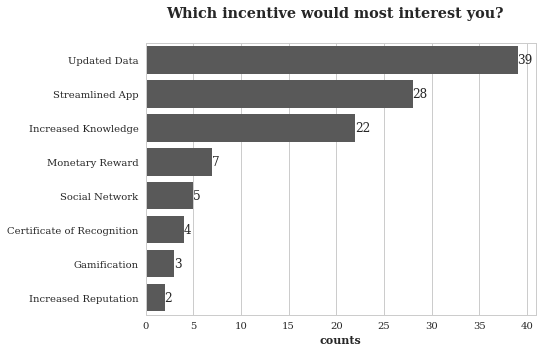

In [30]:
#Question 18: Of these listed, which incentive would most interest you? (Insert Number)
df2 = df[['Question 18P1', 'Question 18P2']].copy()
Counts = df2.apply(pd.Series.value_counts)
Counts['Sum'] = Counts.sum(axis=1)

y = ['Increased Knowledge', 'Updated Data', 'Streamlined App', 'Social Network',
     'Increased Reputation',  'Certificate of Recognition', 'Gamification', 
     'Monetary Reward']
x = list(Counts['Sum'])

f = plt.figure()
f.suptitle('Which incentive would most interest you?', fontweight='bold')
f.set_size_inches(7, 5)


Question18 = sbn.barplot(x=x, y=y, data=Counts,
                         color='0.35', order=['Updated Data', 'Streamlined App',
                                              'Increased Knowledge', 'Monetary Reward',
                                              'Social Network', 'Certificate of Recognition',
                                              'Gamification', 'Increased Reputation'])                                        
                                       
Question18.yaxis.set_label_text(" ", fontweight='bold')
Question18.xaxis.set_label_text("counts", fontweight='bold')
for p in Question18.patches:
    x = p.get_bbox().get_points()[1, 0]
    y = p.get_bbox().get_points()[:, 1]
    Question18.annotate('{:1.0f}'.format(x), (x, y.mean()), 
            ha='left', va='center')
# Export Figure
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question18.png'
f.savefig(filename, dpi=300, format='png')

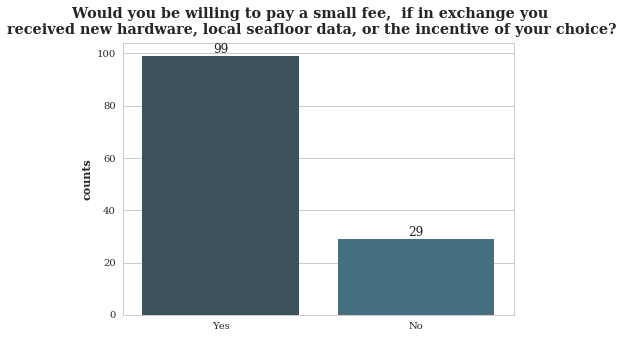

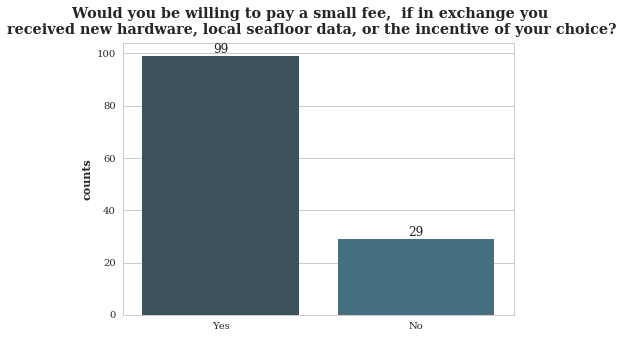

In [31]:
# Question 19: Would you be willing to pay a small fee, 
# if in exchange you received new hardware, local seafloor data,
# or the incentive of your choice?
f = plt.figure()
f.suptitle('Would you be willing to pay a small fee,  if in exchange you \n'
           'received new hardware, local seafloor data, or the'
           ' incentive of your choice?', fontweight='bold')

f.set_size_inches(7, 5)
set_style()
sbn.set_palette('GnBu_d')

Question19 = sbn.countplot(x="Question 19", data=df, order=['Yes', 'No'])              
Question19.xaxis.set_label_text("  ", fontweight='bold')
Question19.yaxis.set_label_text("counts", fontweight='bold')
for p in Question19.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question19.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question19.png'
f.savefig(filename, dpi=300, format='png')

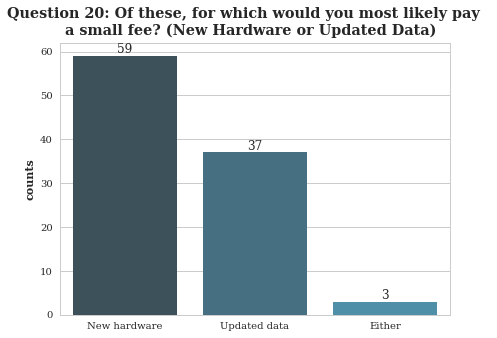

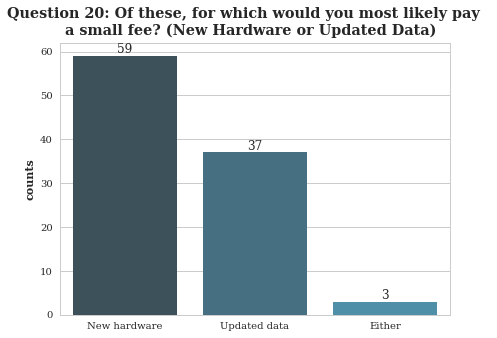

In [32]:
# Question 20: Of these, for which would you most likely pay a small fee? 
# (New Hardware or Updated Data)
f = plt.figure()
f.suptitle('Question 20: Of these, for which would you most '
           'likely pay  \n a small fee? (New Hardware or Updated Data)', fontweight='bold')

f.set_size_inches(7, 5)
set_style()
sbn.set_palette('GnBu_d')

Question20 = sbn.countplot(x="Question 20", data=df)              
Question20.xaxis.set_label_text("  ", fontweight='bold')
Question20.yaxis.set_label_text("counts", fontweight='bold')
for p in Question20.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    Question20.annotate('{:1.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom')
# Export
filename = '/home/mapper/SurveyMonkey/MapTheSeas/Products/SurveyResponsesPLTs/Question20.png'
f.savefig(filename, dpi=300, format='png')